Adjunte una Jupyter Notebook en donde quede expresado el desarrollo matemático que permite obtener el valor del nivel de decisión para el caso del ejemplo planteado en la clase, esto es para una regla de decisión ML y valores de intensidad de \lambda_0= 1   y \lambda_1=3.

Para armar las expresiones matemáticas que necesite incorporar en la Jupyter Notebook puede recurrir a herramientas tales como:

Equation Editor: https://editor.codecogs.com/

O consultar páginas tales como:

Manual de Latex: https://manualdelatex.com/simbolos#chapter2

RESPUESTA: 1.8

# ---------------------------------------

Si la regla de decisión a usar es ML, entonces $p(H_1)$ = $p(H_0)$ = 0.5

"Y", la salida del canal, tiene una distribución Poisson, Y ~ $P_{Y|H}(y,\bullet)$ = $\frac{e^{-\lambda}*\lambda^{x}}{x!}$, y a partir del observable se debe decidir qué hipótesis es la correcta

Para $H_0$, la intensidad $\lambda_0$ = 1 y para $H_1$, la intensidad $\lambda_1$ = 3

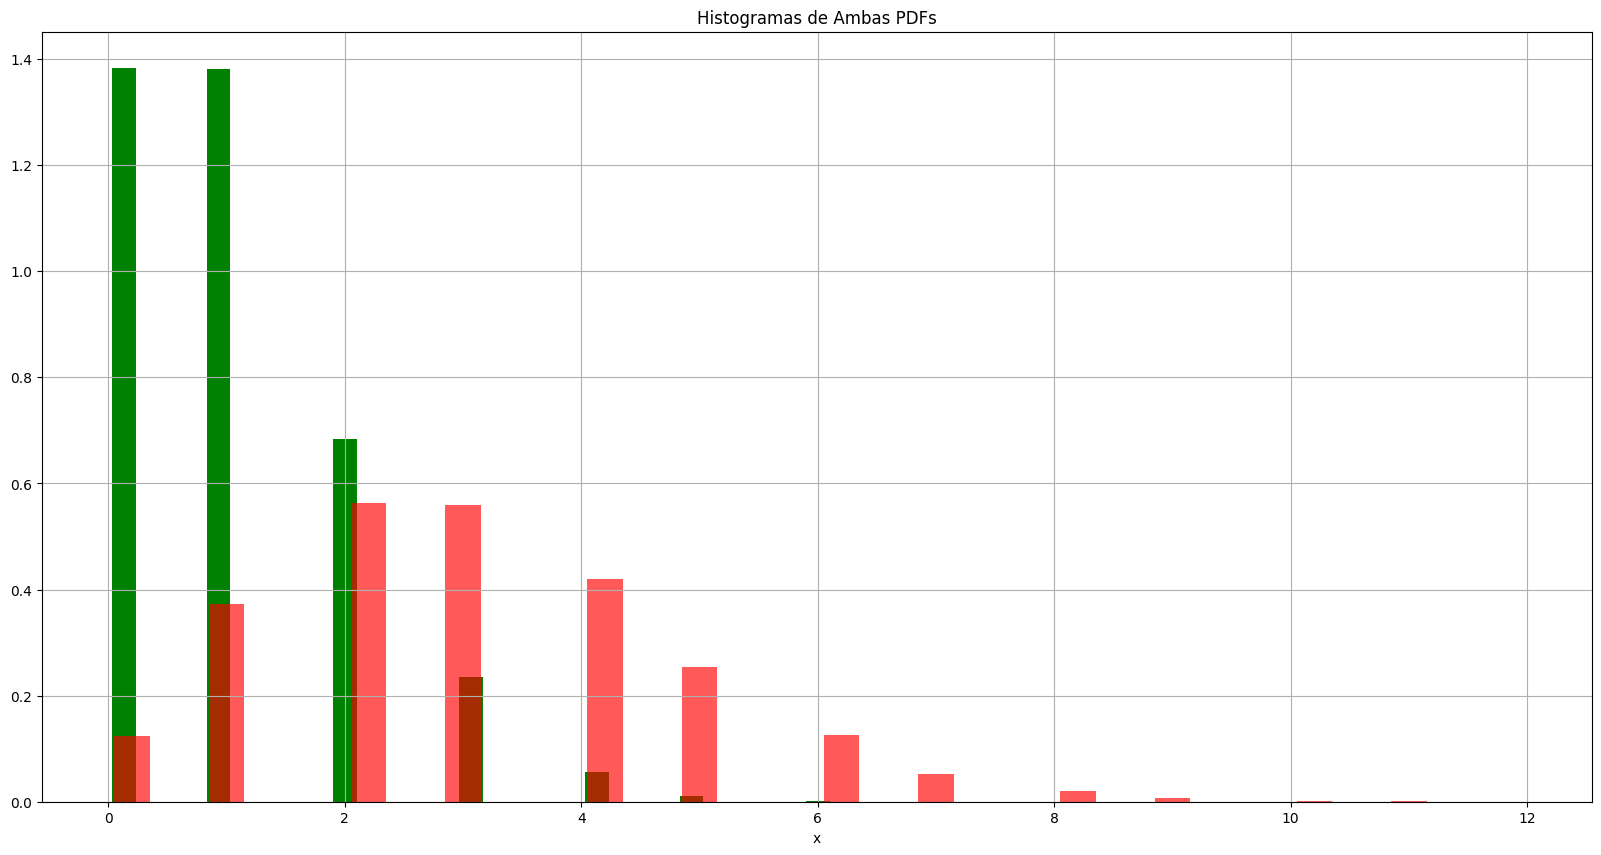

In [124]:
import numpy as np
import matplotlib.pyplot as plt

lambda_0 = 1;
lambda_1 = 3;
intentos = 100000;

pdf0 = np.random.poisson(lambda_0,intentos);
pdf1 = np.random.poisson(lambda_1,intentos);

plt.figure(figsize=(20,10))
plt.grid()
plt.title("Histogramas de Ambas PDFs")
plt.xlabel("x")
# plt.ylabel("Amplitud")
plt.hist(pdf0,bins = 30,density=True,alpha = 1,color="green",rwidth=.75,align="mid")
plt.hist(pdf1,bins = 30,density=True,alpha = .65,color="red",rwidth=.75,align="mid")
plt.show()

Usando la regla de decisión ML, $\hat{H}(y) = arg \underset{i \in H}{MAX}  P_{Y|H}(y|i)$ 

Y específicamente en un caso binario: 
$P_{Y|H}(y|1)  \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}}           P_{Y|H}(y|0)$

Reemplazando $P_{Y|H}(y|1) y P_{Y|H}(y|0)$  por $\frac{e^{-\lambda_1}*\lambda_1^{x}}{x!}$ y $\frac{e^{-\lambda_0}*\lambda_0^{x}}{x!}$ respectivamente

$\frac{e^{-\lambda_1}*\lambda_1^{x}}{x!}   \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}}  \frac{e^{-\lambda_0}*\lambda_0^{x}}{x!}$   Se cancelan los factoriales

$e^{-\lambda_1}*\lambda_1^{x}   \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}}  e^{-\lambda_0}*\lambda_0^{x}$    Ahora se despejan los numeros, de las variables

$\frac{\lambda_1^{x}}{\lambda_0^{x}}  \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}} \frac{e^{\lambda_1}}{e^{\lambda_0}} $ Luego reemplazo cada $\lambda$ por su valor correspondiente

$\frac{3^{x}}{1^{x}} \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}} e^{2} $     Ahora, ya que $1^{x}$ es constante, lo elimino y aplico logaritmos de base 3 a ambos miembros

$x = log_3{3^{x}} \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}}    log_3{e^{2}} = 1.82$ ----->            Entonces, $x \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}} 1.82$

In [125]:
#Simulacion de recepción y Probabilidad de Error (En base a las notas de Clase)
veces = 300; H = np.random.randint(0,2,veces); umbral = 1.82; decisiones = []; y = [];


for n in range(veces):
    if(H[n] == 1):
        y.append(np.random.poisson(lambda_1))
    else:   
        y.append(np.random.poisson(lambda_0))

for n in range(veces):
    if(umbral > y[n]):
        decisiones.append(0)
    else:
        decisiones.append(1)

Pe = sum((H != decisiones))/veces

#print("Hipotesis\n",H)
#print("Hipotesis decodificada por el receptor\n", decisiones)
print("Probabilidad de Error: ",Pe)


Probabilidad de Error:  0.21333333333333335
